# Exploración grafica de analisis de datos
## Analisis Exploratorio de Datos (EDA)
### Adrián Vázquez 
#### 17/05/21

<b> EDA </b>
-  El EDA se utiliza para ver lo que los datos pueden decirnos antes de la tarea de modelación. No es fácil mirar una columna de números o una hoja de cálculo y determinar las características importantes de los datos. 

<b> EDA deconstruido </b>
- Al llegar un archivo, lo primero que deberíamos hacer es intentar responder:

  - ¿Cuántos registros hay?
  - ¿Son demasiado pocos?
  - ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
  - ¿Están todas las filas completas ó tenemos campos con valores nulos?
  - En caso que haya demasiados nulos: ¿Queda el resto de información inútil?
  - ¿Que datos son discretos y cuales continuos?
    Muchas veces sirve obtener el tipo de datos: texto, int, double, float
  - Si es un problema de tipo supervisado:
  - ¿Cuál es la columna de “salida”? ¿binaria, multiclase?
  - ¿Esta balanceado el conjunto salida?
  - ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?
  - ¿Siguen alguna distribución?
  - ¿Hay correlación entre features (características)?
  - En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo “Abogado” y “Abogadas”, “avogado” pertenecerían todos a un mismo conjunto.
  - ¿Estamos ante un problema dependiente del tiempo? Es decir un TimeSeries.
  - Si fuera un problema de Visión Artificial: ¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?
  - ¿Cuales son los Outliers? (unos pocos datos aislados que difieren drásticamente del resto y “contaminan” ó desvían las distribuciones)
  - Podemos eliminarlos? es importante conservarlos?
  - son errores de carga o son reales?
  - ¿Tenemos posible sesgo de datos? (por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine)
  - Puede ocurrir que tengamos set de datos incompletos y debamos pedir a nuestro cliente/proveedor ó interesado que nos brinde mayor información de los campos, que aporte más conocimiento ó que corrija campos.

> Obtenido de https://www.aprendemachinelearning.com/analisis-exploratorio-de-datos-pandas-python/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Cargar URL 

In [4]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=";") #index_col=0
print(df.head(5))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

In [9]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (252, 19)
Nombre columnas: Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


<b> Información basica sobre el df </b>

- conocer tipo de dato, cuantos hay y non-null

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

<b> Información sobre estadisticas sencillas del df </b>

In [8]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


# graficando un histograma sobre el conjunto iris

In [51]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_iris #<---- Importamos el dataset iris desde sklearn

sns.set()   #<-----establecemos el estilo Seaborn por defecto 

iris_df = pd.read_csv('datos/Iris.csv')

print(iris_df)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

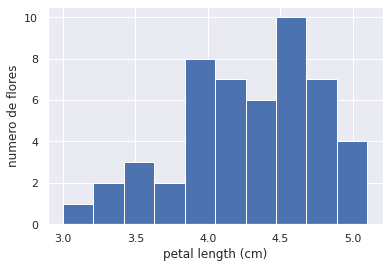

In [143]:
versicolor = iris_df[iris_df['Species'] == 'Iris-versicolor']
versicolor_petal_lenght = versicolor['PetalLengthCm']
_ = plt.hist(versicolor_petal_lenght)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('numero de flores')
plt.show()

- El histograma que acabas de hacer tiene diez bins. Este es el valor por defecto de matplotlib. La "regla de la raíz cuadrada" es una regla empírica comúnmente utilizada para elegir el número de contenedores: elegir el número de contenedores para ser la raíz cuadrada del número de muestras. Vuelva a trazar el histograma de las longitudes de los pétalos de Iris versicolor, esta vez utilizando la regla de la raíz cuadrada para el número de intervalos. Se especifica el número de intervalos utilizando el argumento de la palabra clave bins de plt.hist().

50
7


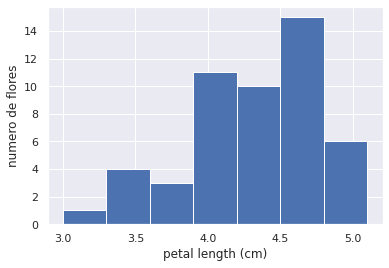

In [144]:
# calculamos el tamaño de versicolor_petal_lenght con len()
numero_de_datos = len(versicolor_petal_lenght)

# El numero de intervalos (bins) es la raiz cuadrada del numero de datos
n_bins = np.sqrt(numero_de_datos)

#convertimos n_bins a un numero entero 
n_bins = int(n_bins)

print(numero_de_datos)
print(n_bins)


#Histograma
_ = plt.hist(versicolor_petal_lenght, n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('numero de flores')

plt.show()

# Un problema con los histogramas es que el conjunto de datos puede verse diferente dependiendo de como se elijan los bins y la elección de bins es arbitraria en muchos sentidos. 

- Esto lleva a sesgos: puede interpretar su grafico de manera diferente para dos opciones diferentes de numero de bines 

- otro detalle es que en los histogramas. No graficamos todos los datos. Estamos barriendo los datos en bines y perdiendo su valor real. 

- Para remediar esto. utilizamos una Bee swarm plot

## Bee swarm plot 
- Un requisito para que use una Bee swarm plot es que sus datos esten en un Pandas bien organizado.
  - cada columna es una caracteristica y cada renglón una observación 

/home/radianvm/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


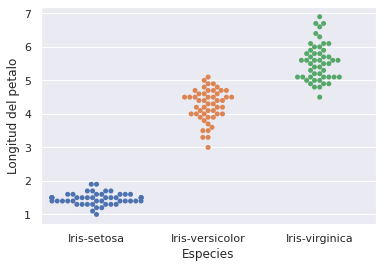

In [145]:
sns.swarmplot(x = 'Species', y = 'PetalLengthCm', data = iris_df)
_ = plt.xlabel('Especies')
_ = plt.ylabel('Longitud del petalo')
plt.show()


<b> OBSERVACIÓN</b>

  > Los petalos de Iris-virginica tienden a ser mas largos y los de iris-setosa mas chicos 

## Función de distribución acumulativa empírica o ECDFs

<b>El ECDF: </b> 
- Estima la verdadera función de densidad acumulativa subyacente de los puntos en la muestra; Se garantiza
    virtualmente que converge con la distribución verdadera a medida que el tamaño de la muestra se hace lo suficientemente grande.

> Generando un ECDF 
  - el eje y son los puntos de datos especificados uniformemente con un maximo de uno

- usamos la función plt.margins() para asegurarnos de que ninguno de los puntos de datos se extienda por el costado del areade trazado

In [79]:
# Función para calcular un ECDF: devuelve x y y del ECDF
import numpy as np 
def ecdf(datos): 
    n = len(datos) #<------ Numero de puntos de datos
    x = np.sort(datos) #<----- ordena los datos 
    y = np.arange(1, len(x) + 1)/n #<------ datos especificamos uniformemente con maximo de uno 
    return x, y  #<--------- Regresar valores para x y y



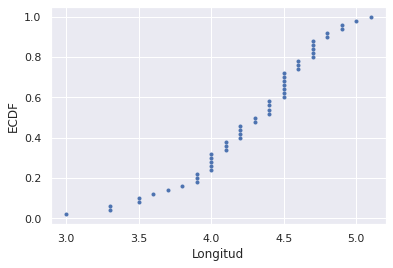

In [146]:
# calculando el ECDF para veriscolor data
x_vers, y_vers = ecdf(versicolor_petal_lenght)
    
plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.xlabel('Longitud')
_ = plt.ylabel('ECDF')

plt.show()

In [83]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [137]:
# filtrando el dataset por cada grupo de plantas y obteniendo solo la tabla de longitud y dejandola como una serie
# pandas 
petal__setosa = iris_df[iris_df['Species'] == 'Iris-setosa']
setosa_PetalLengthCm = petal__setosa['PetalLengthCm']

petal__virginica = iris_df[iris_df['Species'] == 'Iris-virginica']
virginica_PetalLengthCm = petal__virginica['PetalLengthCm']

petal__versicolor = iris_df[iris_df['Species'] == 'Iris-versicolor']
versicolor_PetalLengthCm = petal__versicolor['PetalLengthCm']

type(setosa_PetalLengthCm)

pandas.core.series.Series

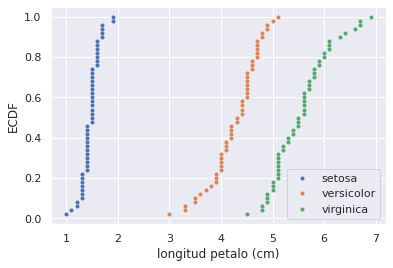

In [141]:
x_setosa, y_setosa = ecdf(setosa_PetalLengthCm)
x_virginica, y_virginica = ecdf(virginica_PetalLengthCm)
x_versicolor, y_versicolor = ecdf(versicolor_PetalLengthCm)


_ = plt.plot(x_setosa, y_setosa, marker = '.', linestyle = 'none')

_ = plt.plot(x_versicolor, y_versicolor, marker = '.', linestyle = 'none')

_ = plt.plot(x_virginica, y_virginica, marker = '.', linestyle = 'none')

_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc ='lower right')
_ = plt.xlabel('longitud petalo (cm)')
_ = plt.ylabel('ECDF')

plt.show()